### 【問題1】コンペティション内容の確認 
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。
何を学習し、何を予測するのか
どのようなファイルを作りKaggleに提出するか
提出されたものはどういった指標値で評価されるのか

借金を返せるかどうか

返せるかどうかの確立を予測するｺｰﾄﾞと予測結果

ROC曲線で評価

### 【問題2】学習と検証 
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。
検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.datasets import load_iris
df = pd.read_csv("application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df.isnull().sum()
df_drop = df.dropna()
df_drop.isnull().sum()
df_drop.shape

(8602, 122)

In [3]:
X_ = df_drop.drop("TARGET",axis=1)
y_ = df_drop.loc[:,["TARGET"]]

In [4]:
X_.shape
y_.shape

(8602, 1)

In [5]:
X_2 = X_.select_dtypes(exclude="object")
X_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 105 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40)
memory usage: 7.0 MB


In [6]:
from sklearn.model_selection import train_test_split
X = np.array(X_2)
y = np.array(y_)
display(X_.shape)
display(y_.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=0)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(8602, 121)

(8602, 1)

(6451, 105)

(2151, 105)

(6451, 1)

(2151, 1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train) 

print("accuracy_score：{:.3g}".format(accuracy_score(y_test, neigh.predict(X_test))))
print("precision_score：{:.3g}".format(precision_score(y_test, neigh.predict(X_test))))
print("recall_score：{:.3g}".format(recall_score(y_test, neigh.predict(X_test))))
print("f1_score：{:.3g}".format(f1_score(y_test, neigh.predict(X_test))))
from sklearn.metrics import confusion_matrix
print("confusion_matrix：\n{}".format(confusion_matrix(y_test, neigh.predict(X_test))))

C:\Users\anai\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


accuracy_score：0.931
precision_score：0.25
recall_score：0.00685
f1_score：0.0133
confusion_matrix：
[[2002    3]
 [ 145    1]]


In [8]:
y_pred = neigh.predict(X_test)

In [9]:
from sklearn import metrics

In [10]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
auc

0.5026765278584362

### 【問題3】テストデータに対する推定 
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。
正しく提出が行えていれば、精度は低くても構いません。

In [11]:
test_data = pd.read_csv("application_test.csv")

In [12]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
test_data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [14]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
test_data2 = test_data.select_dtypes(exclude="object")

In [16]:
test_data2.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [17]:
test_data2.isnull().sum()

SK_ID_CURR                         0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       24
AMT_GOODS_PRICE                    0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                    32312
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
L

In [18]:
test_data2.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)

In [19]:
test_data2

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,0,270000.0,959688.0,34600.5,810000.0,0.025164,-18604,-12009,-6116.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,2,180000.0,499221.0,22117.5,373500.0,0.022800,-16685,-2580,-10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,0,166500.0,180000.0,14220.0,180000.0,0.005144,-9516,-1387,-5063.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,0,315000.0,364896.0,28957.5,315000.0,0.046220,-12744,-1013,-1686.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,1,162000.0,45000.0,5337.0,45000.0,0.018634,-10395,-2625,-8124.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [20]:
for dataset in test_data2.columns:
    test_data2[dataset].fillna(test_data2[dataset].mean(), inplace=True)

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [21]:
y_pred_prba = neigh.predict_proba(test_data2)

In [26]:
y_pred_prba[:, 1]

array([0.2, 0. , 0. , ..., 0. , 0. , 0. ])

In [27]:
test_data2["TARGET"] = y_pred_prba[:, 1]

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
test_data2["TARGET"].value_counts()

0.0    34312
0.2    12574
0.4     1741
0.6       94
0.8       18
1.0        5
Name: TARGET, dtype: int64

In [33]:
submittion = test_data2.loc[:, ["SK_ID_CURR", "TARGET"]]

In [35]:
submittion.to_csv("submission_file.csv", index=False)

### 【問題4】特徴量エンジニアリング 
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。
どの特徴量を使うか
どう前処理をするか
何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。
精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

In [11]:
df_drop_1hot = pd.get_dummies(df_drop, columns=df_drop.select_dtypes(include="object").columns)
display(df_drop_1hot.shape)
display(df_drop.info())
display(df_drop_1hot.info())

(8602, 235)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 8.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 235 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(65), int64(41), uint8(129)
memory usage: 8.1 MB


None

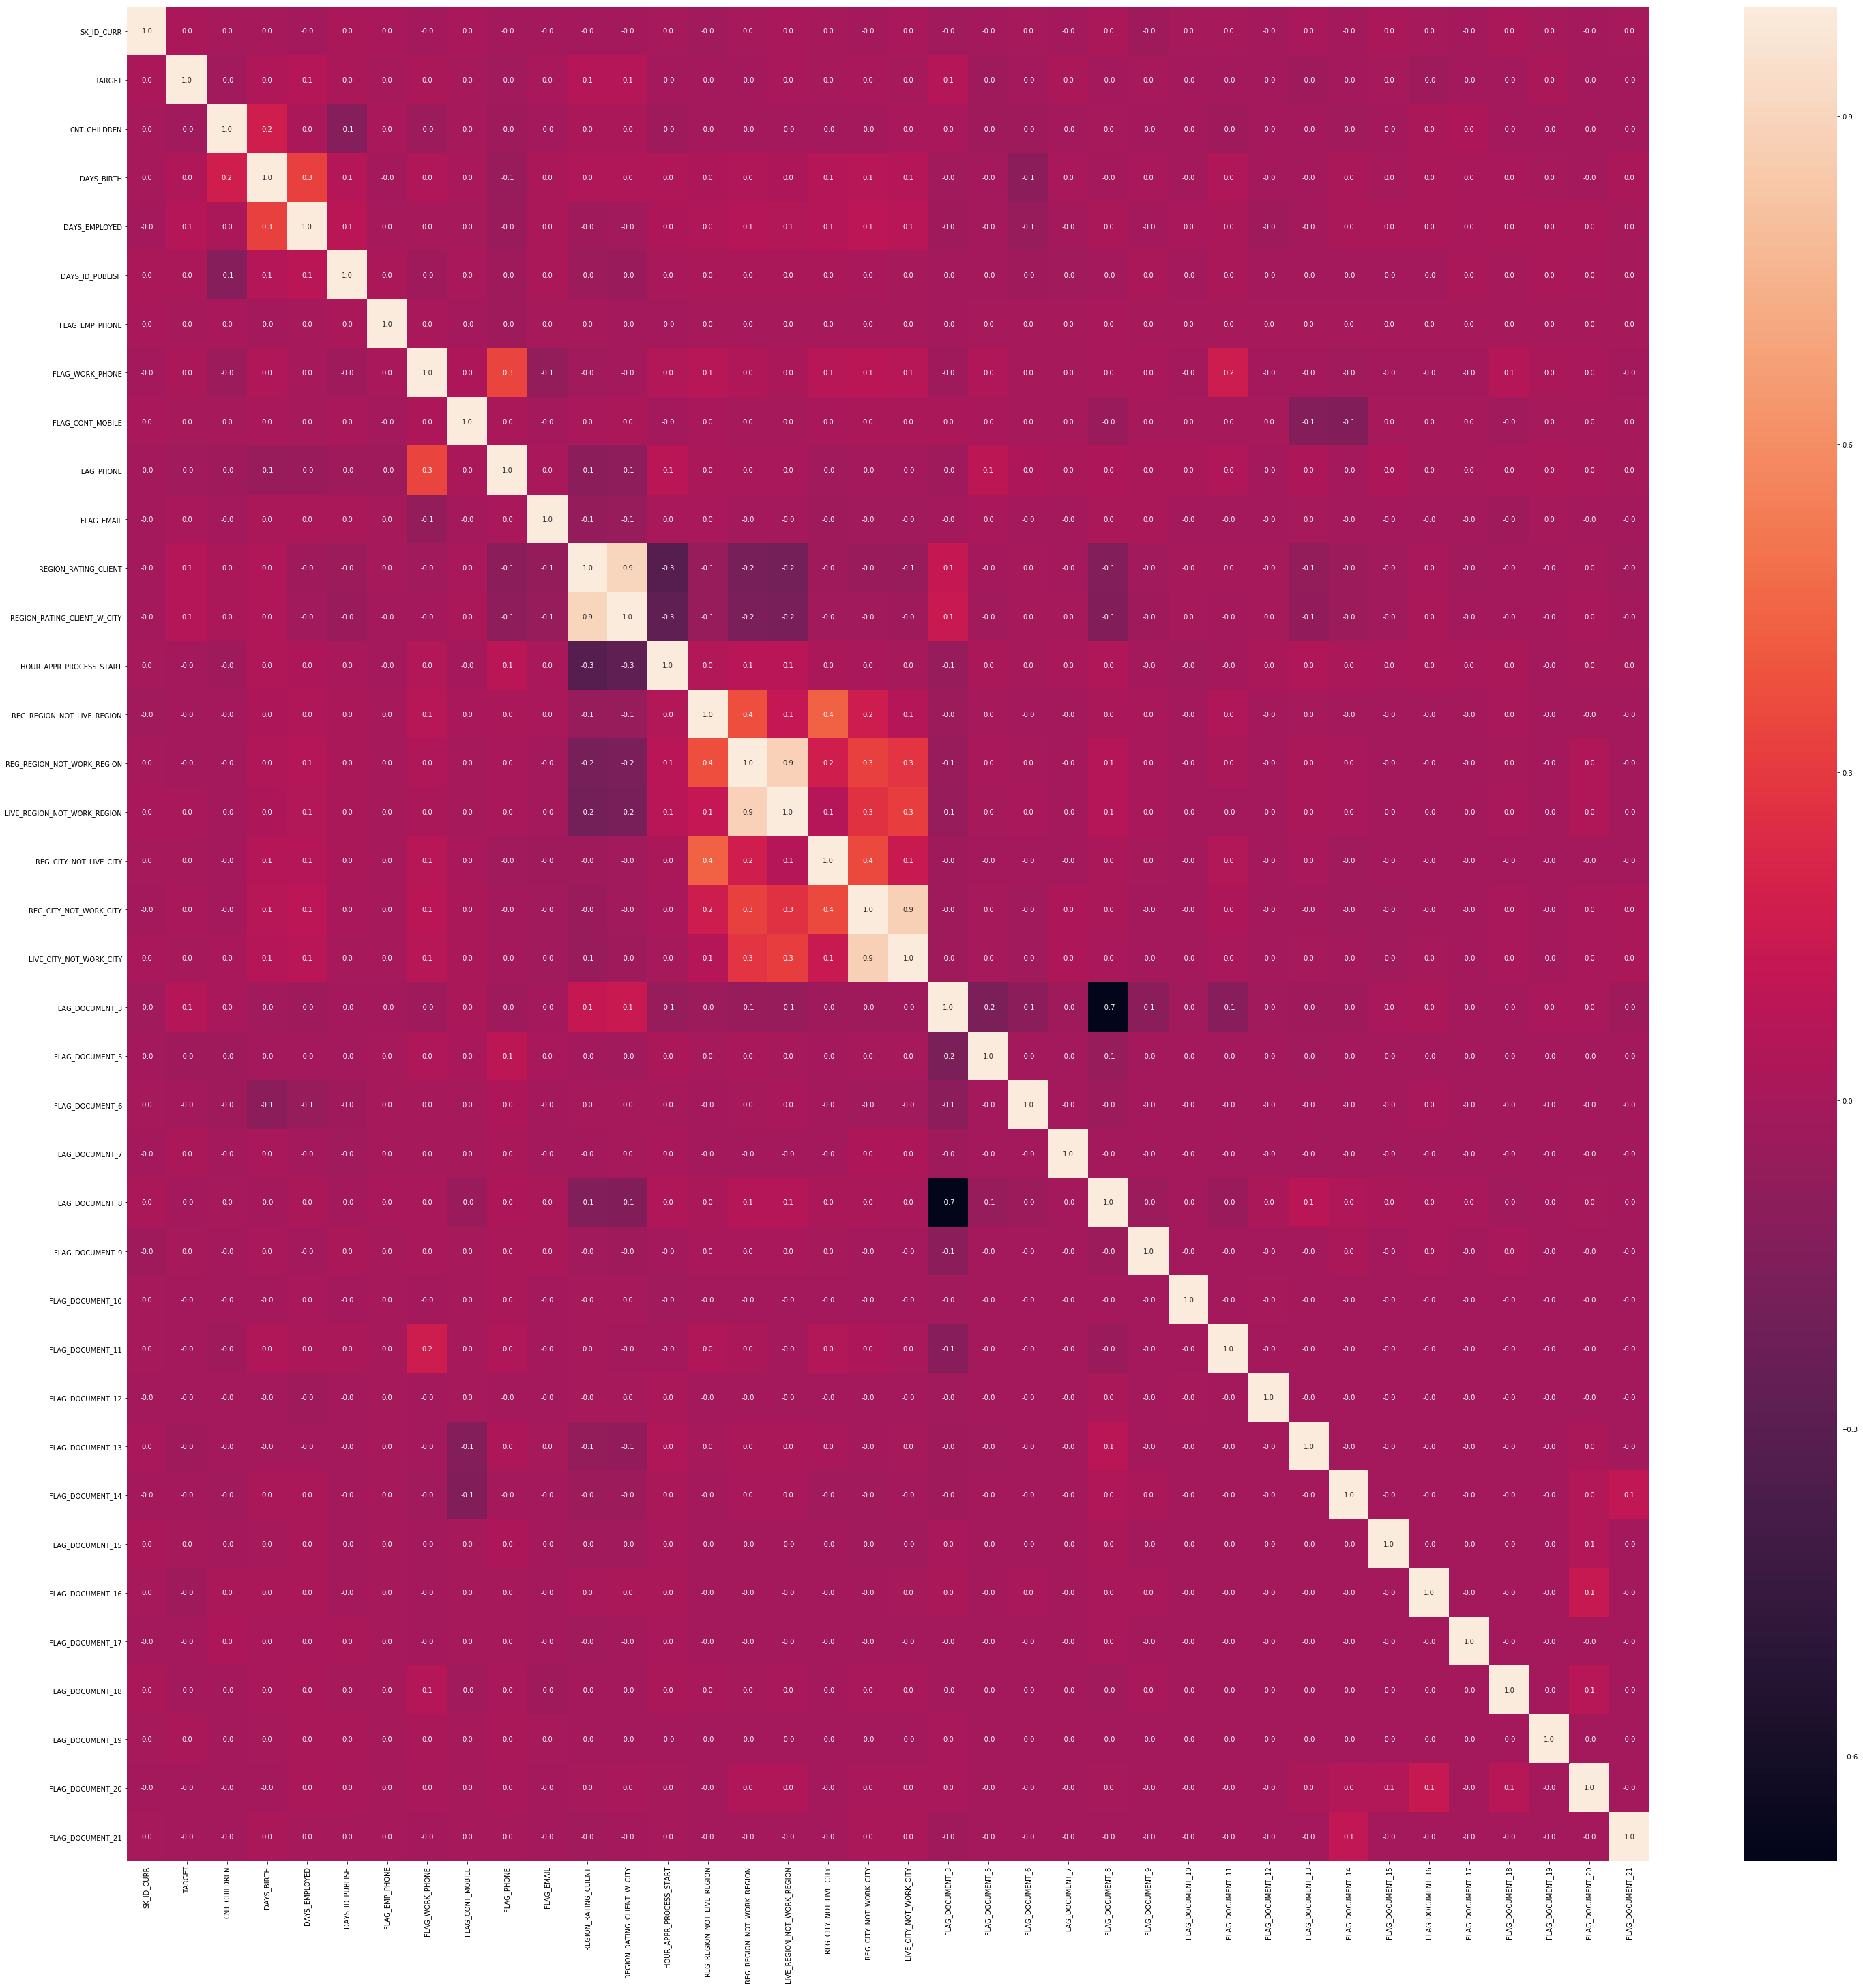

In [48]:
import seaborn as sns
df_drop_1hot_int = df_drop_1hot.select_dtypes(include="int64")
df_drop_1hot_int_corr = df_drop_1hot_int.corr()
df_drop_1hot_int_corr_d1 = df_drop_1hot_int_corr.drop(["FLAG_MOBIL","FLAG_DOCUMENT_2","FLAG_DOCUMENT_4"])
df_drop_1hot_int_corr_d2 = df_drop_1hot_int_corr_d1.drop(["FLAG_MOBIL","FLAG_DOCUMENT_2","FLAG_DOCUMENT_4"],axis=1)
plt.figure(figsize=(50, 50)) 
sns.heatmap(df_drop_1hot_int_corr_d2, annot=True, fmt="1.1f")
plt.savefig('heatmap_df_drop_1hot_int_corr_d2.png')

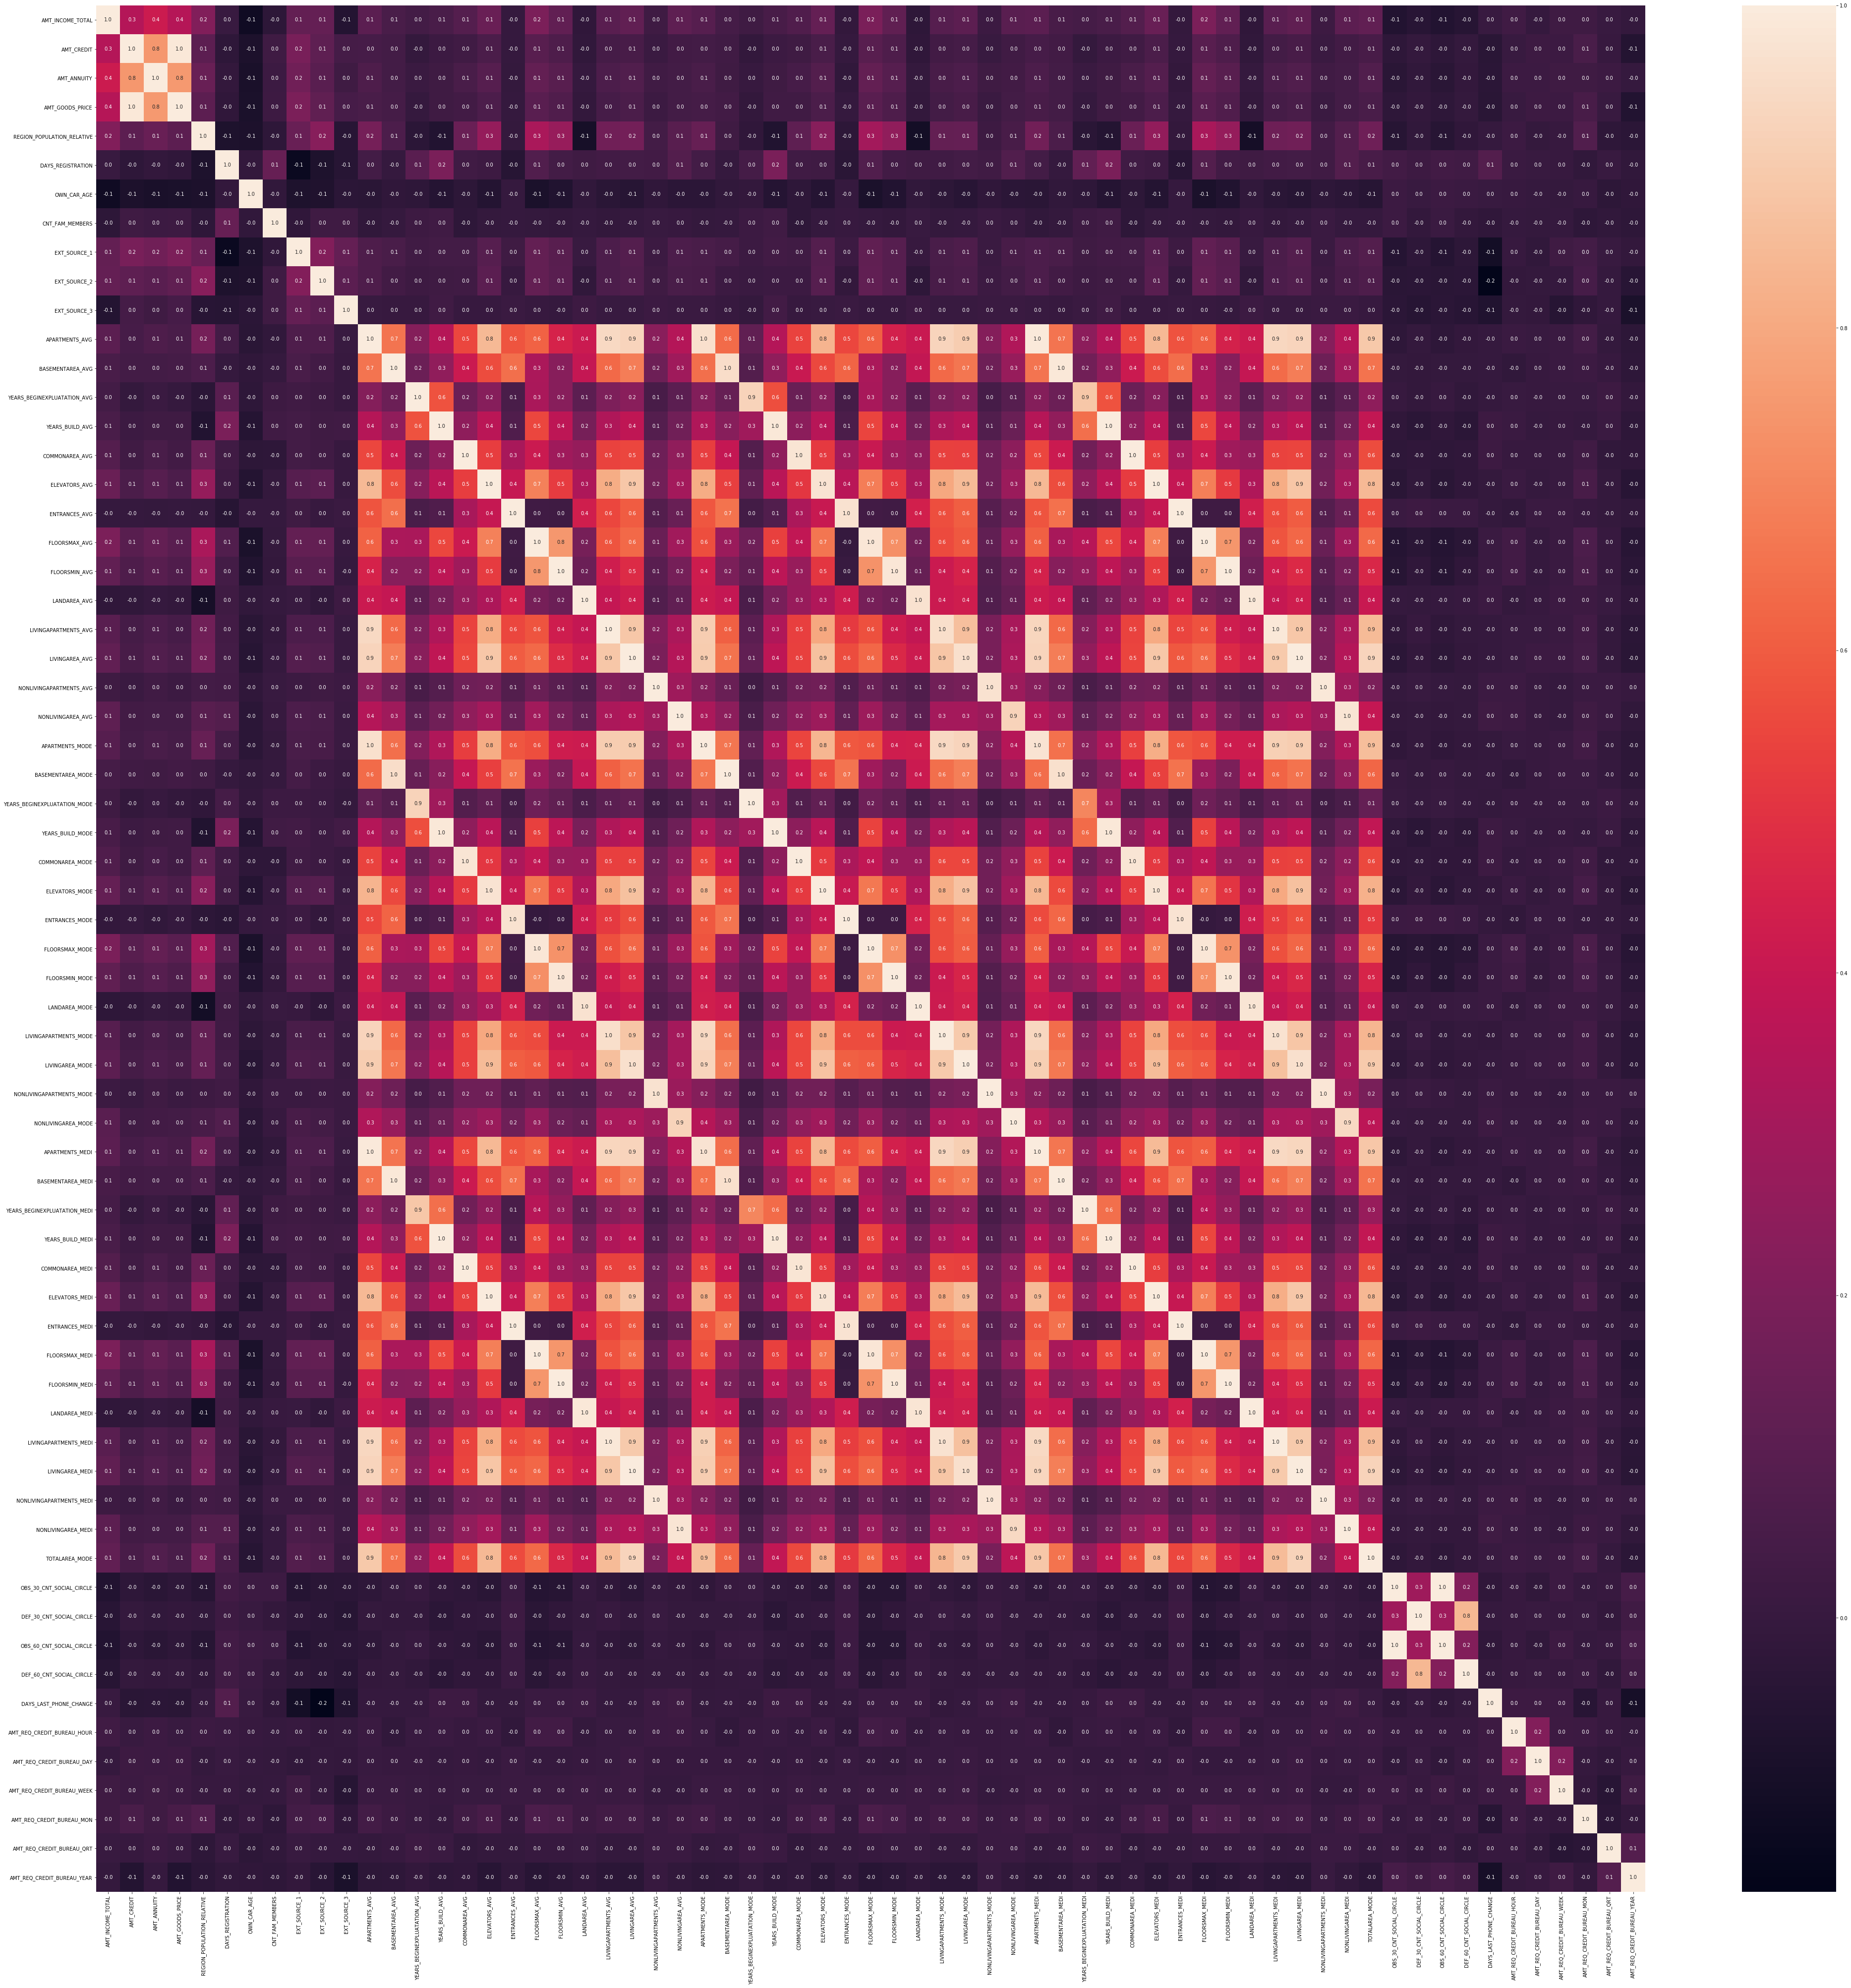

In [14]:
df_drop_1hot_float = df_drop_1hot.select_dtypes(include="float64")
df_drop_1hot_float_corr = df_drop_1hot_float.corr()

pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_rows", 100)

plt.figure(figsize=(70, 70)) 
sns.heatmap(df_drop_1hot_float_corr, annot=True, fmt="1.1f")
plt.savefig('heatmap_df_drop_1hot_float_corr.png')

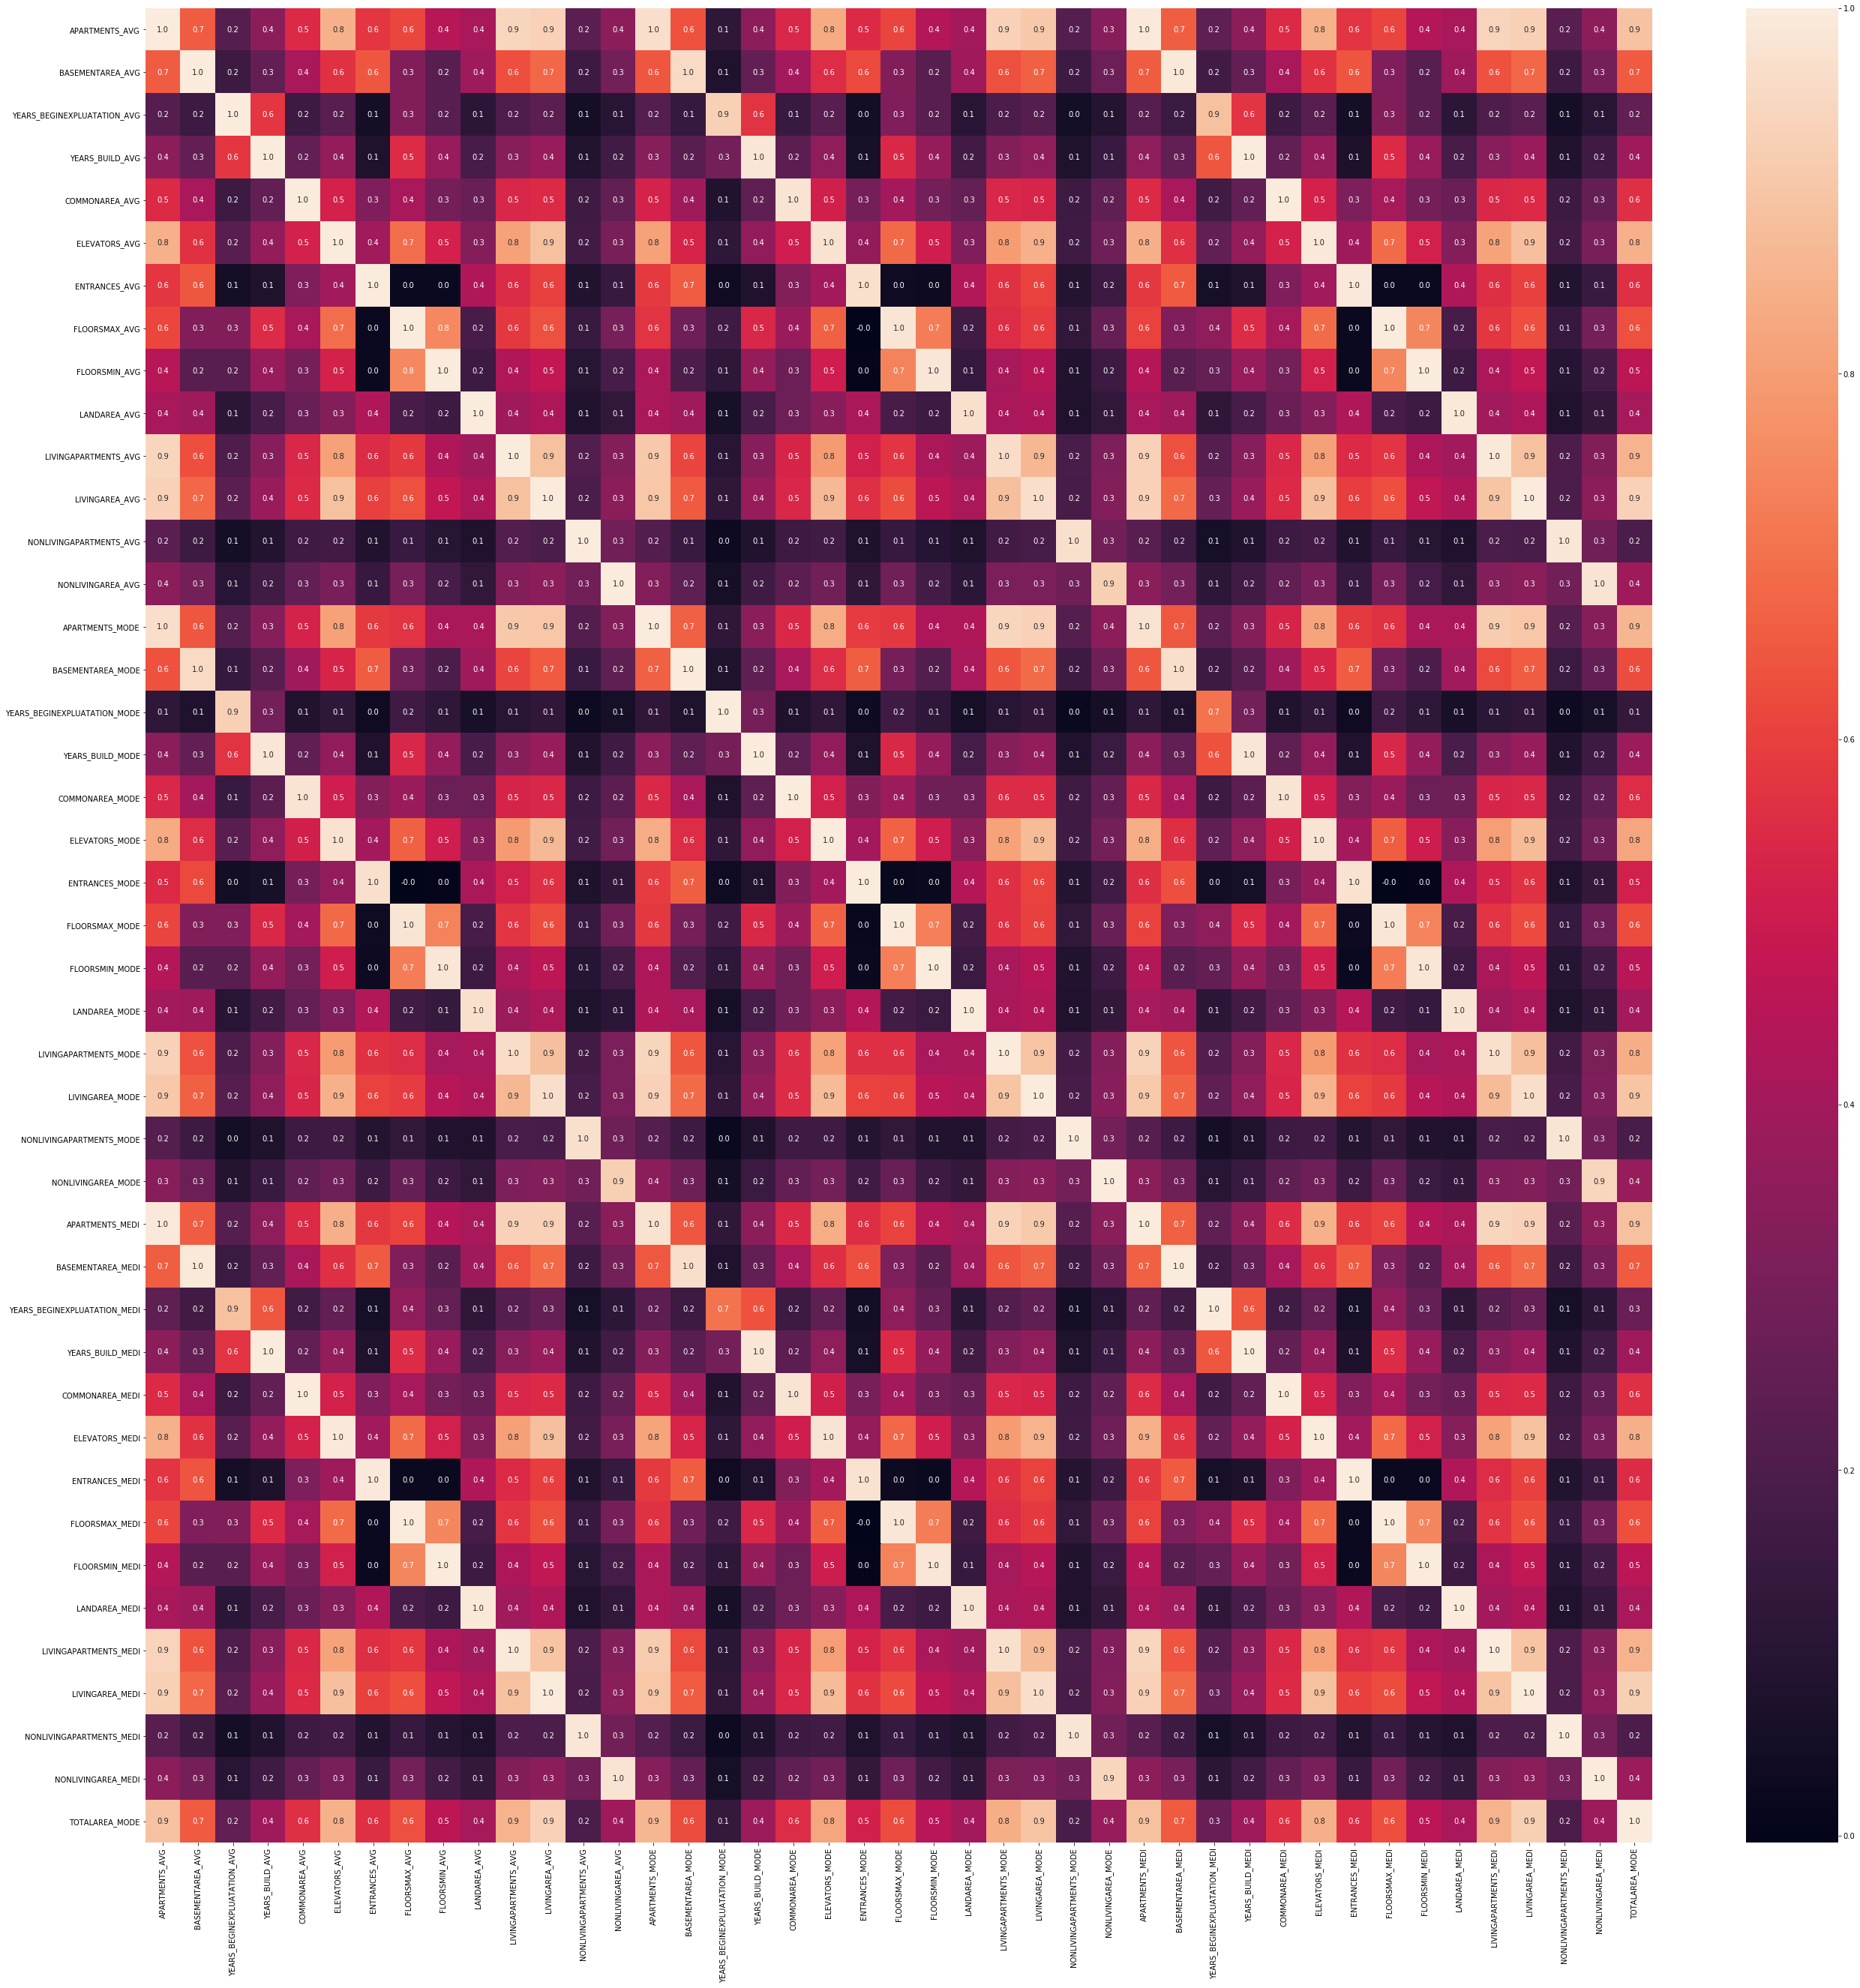

In [18]:
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_rows", 100)

df_drop_1hot_float_corr11 = df_drop_1hot_float_corr.iloc[11:-11,11:-11]
plt.figure(figsize=(45, 45)) 
sns.heatmap(df_drop_1hot_float_corr11, annot=True, fmt="1.1f")
plt.savefig('heatmap_df_drop_1hot_float_corr_11-11.png')

In [15]:
df_drop_1hot_intfloat = df_drop_1hot.select_dtypes(include=["int64","float64"])
df_drop_1hot_intfloat.shape
df_drop_1hot_intfloat_corr = df_drop_1hot_intfloat.corr()
#df_drop_1hot_intfloat_corr.shape

df_drop_1hot_intfloat_corr_target  = df_drop_1hot_intfloat_corr["TARGET"].sort_values(ascending=False)
print(df_drop_1hot_intfloat_corr_target)
#print(df_drop_1hot_intfloat_corr_target[-11:-1])

TARGET                          1.000000
DAYS_EMPLOYED                   0.062950
REGION_RATING_CLIENT_W_CITY     0.061214
FLAG_DOCUMENT_3                 0.054269
REGION_RATING_CLIENT            0.053614
DAYS_BIRTH                      0.041108
AMT_REQ_CREDIT_BUREAU_YEAR      0.033832
OBS_30_CNT_SOCIAL_CIRCLE        0.031041
OBS_60_CNT_SOCIAL_CIRCLE        0.030730
OWN_CAR_AGE                     0.028052
DAYS_ID_PUBLISH                 0.024877
DEF_30_CNT_SOCIAL_CIRCLE        0.022807
FLAG_DOCUMENT_7                 0.021218
DEF_60_CNT_SOCIAL_CIRCLE        0.020796
DAYS_LAST_PHONE_CHANGE          0.019082
AMT_REQ_CREDIT_BUREAU_QRT       0.016465
SK_ID_CURR                      0.015474
AMT_REQ_CREDIT_BUREAU_WEEK      0.015000
AMT_REQ_CREDIT_BUREAU_DAY       0.014616
FLAG_WORK_PHONE                 0.014212
FLAG_DOCUMENT_19                0.013976
DAYS_REGISTRATION               0.013710
NONLIVINGAPARTMENTS_MODE        0.013384
AMT_REQ_CREDIT_BUREAU_HOUR      0.012156
NONLIVINGAPARTME

In [12]:
pd.set_option("display.max_colwidth", 1000)
pd.set_option("display.max_rows", 110)
display(df_drop.select_dtypes(include=["int64","float64"]))

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,-2311,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,-4472,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,-602,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
296,100341,0,0,76500.0,545040.0,20677.5,450000.0,0.031329,-20348,-7115,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
298,100343,0,0,315000.0,90000.0,4504.5,90000.0,0.022800,-10935,-422,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
316,100363,0,1,360000.0,493497.0,48942.0,454500.0,0.006629,-14882,-436,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
323,100371,0,1,450000.0,808650.0,31464.0,675000.0,0.072508,-14768,-426,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
328,100376,0,0,360000.0,254700.0,20250.0,225000.0,0.018801,-18831,-1342,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
#df_drop_1hot_float_corr11.columns
for column in df_drop_1hot_float_corr11.columns:
    print("[{}]\n------".format(column))
    print(df_drop_1hot_intfloat_corr[column].sort_values(ascending=False)[1:6])

[APARTMENTS_AVG]
------
APARTMENTS_MEDI          0.992189
APARTMENTS_MODE          0.966450
LIVINGAPARTMENTS_AVG     0.943536
LIVINGAPARTMENTS_MEDI    0.939898
LIVINGAPARTMENTS_MODE    0.931267
Name: APARTMENTS_AVG, dtype: float64
[BASEMENTAREA_AVG]
------
BASEMENTAREA_MEDI    0.989534
BASEMENTAREA_MODE    0.955899
LIVINGAREA_AVG       0.681571
LIVINGAREA_MEDI      0.680658
LIVINGAREA_MODE      0.663051
Name: BASEMENTAREA_AVG, dtype: float64
[YEARS_BEGINEXPLUATATION_AVG]
------
YEARS_BEGINEXPLUATATION_MODE    0.926266
YEARS_BEGINEXPLUATATION_MEDI    0.889903
YEARS_BUILD_AVG                 0.577376
YEARS_BUILD_MEDI                0.576107
YEARS_BUILD_MODE                0.569422
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64
[YEARS_BUILD_AVG]
------
YEARS_BUILD_MEDI                0.998219
YEARS_BUILD_MODE                0.988023
YEARS_BEGINEXPLUATATION_MEDI    0.644925
YEARS_BEGINEXPLUATATION_AVG     0.577376
FLOORSMAX_AVG                   0.549570
Name: YEARS_BUILD_AVG, dtype: fl

In [21]:
df_drop_1hot_float_corr11.columns[0].rfind("_")
df_drop_1hot_float_corr11.columns[0]   [:df_drop_1hot_float_corr11.columns[0].rfind("_")]+"_MEDI"
#df_drop_1hot_float_corr11.loc[:,column][:df_drop_1hot_float_corr11.loc[:,column].rfind("_")]+"_MEDI"
#df_drop_1hot_float_corr11.loc[:column][0].rfind("_")

'APARTMENTS_MEDI'

In [22]:
df_drop_1hot_float_corr11[df_drop_1hot_float_corr11[df_drop_1hot_float_corr11.columns[0]] >= 0.9].index
df_drop_1hot_float_corr11[df_drop_1hot_float_corr11.loc[:,"APARTMENTS_AVG"] >= 0.9].index

Index(['APARTMENTS_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'APARTMENTS_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI'],
      dtype='object')

In [109]:
df_drop_1hot_float_corr11.columns[0][:df_drop_1hot_float_corr11.columns[0].find("_")] in df_drop_1hot_float_corr11[df_drop_1hot_float_corr11[df_drop_1hot_float_corr11.columns[0]] >= 0.9].index[0]

True

In [32]:
df_drop_1hot = pd.get_dummies(df_drop, columns=df_drop.select_dtypes(include="object").columns)
display(df_drop_1hot.shape)

(8602, 235)

In [33]:
for column in df_drop_1hot_float_corr11.columns:
    for _column in df_drop_1hot.columns:
        if column == _column:
            for _index in df_drop_1hot_float_corr11[df_drop_1hot_float_corr11.loc[:,column] >= 0.9].index:
                if _index != column[:column.rfind("_")]+"_MEDI":
                    for _column2 in df_drop_1hot.columns:
                        if _index == _column2:
                            del df_drop_1hot[_index]
df_drop_1hot.shape

(8602, 204)

In [34]:
df_drop_1hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 204 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(34), int64(41), uint8(129)
memory usage: 6.0 MB


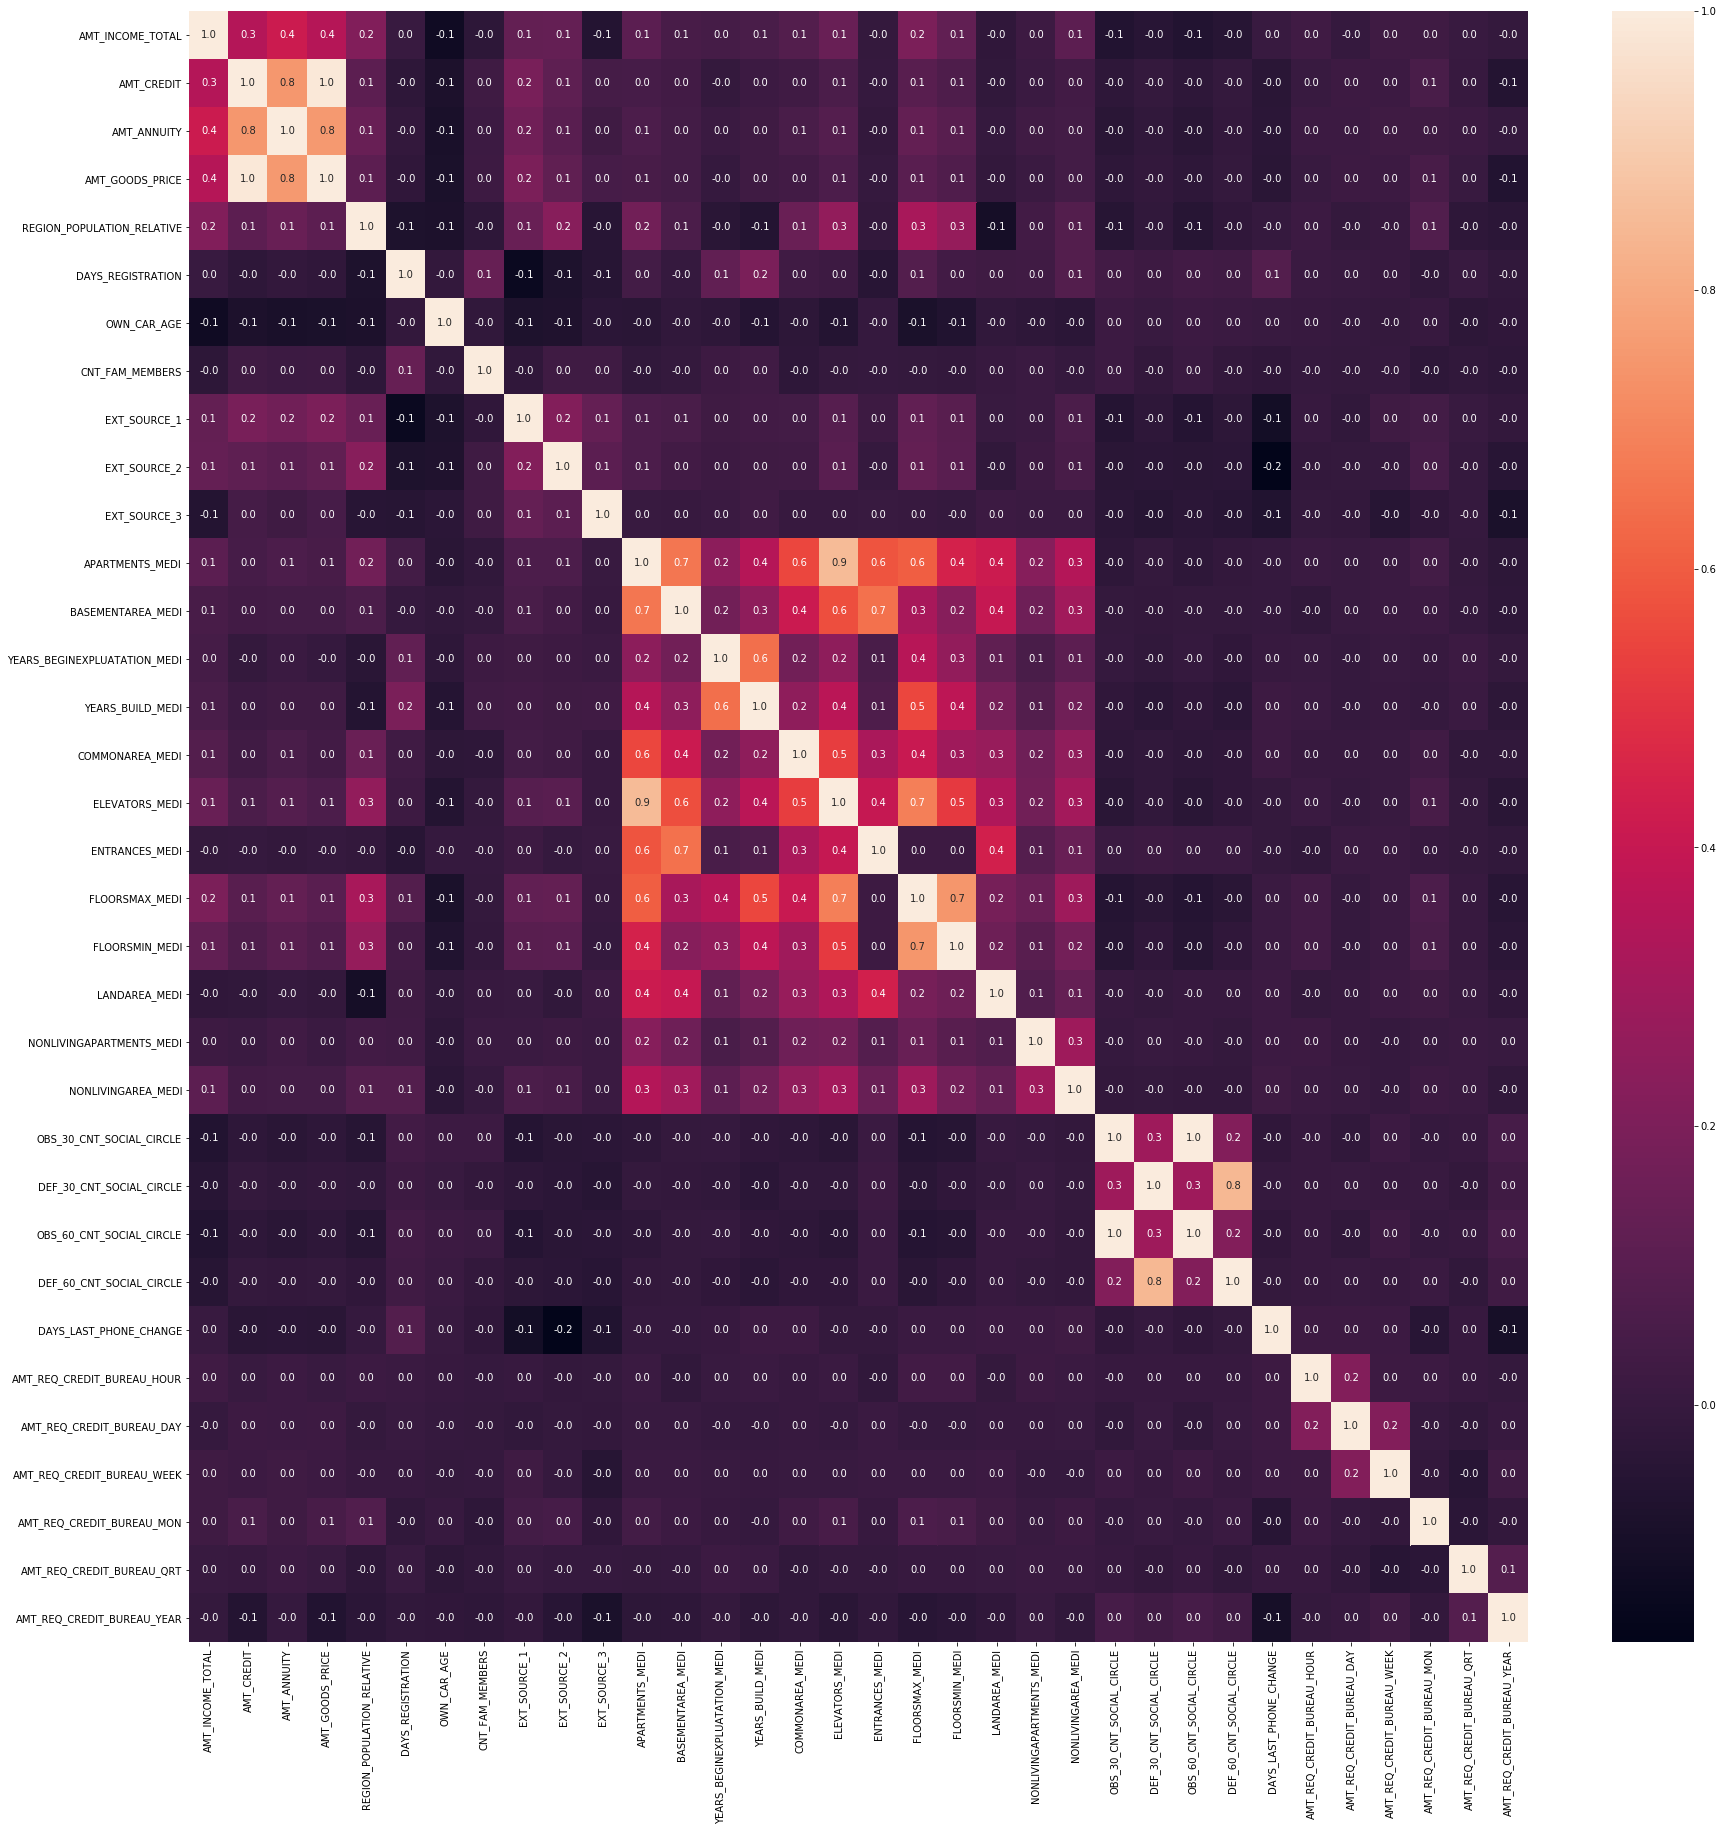

In [35]:
df_drop_1hot_float = df_drop_1hot.select_dtypes(include="float64")
df_drop_1hot_float_corr = df_drop_1hot_float.corr()

pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_rows", 100)

plt.figure(figsize=(30, 30)) 
sns.heatmap(df_drop_1hot_float_corr, annot=True, fmt="1.1f")
plt.savefig('heatmap_df_drop_1hot_float_corr.png')